In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## 1. Load and analyze the dataset

In [2]:
# Loading the dataset
df = pd.read_csv("C:/Users/Chethan/Downloads/Dataset2.csv")
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Checking the shape of the dataset
print(df.shape)


(768, 9)


In [4]:
# Checking the data types of the columns
print(df.dtypes)

Feature_1      int64
Feature_2      int64
Feature_3      int64
Feature_4      int64
Feature_5      int64
Feature_6    float64
Feature_7    float64
Feature_8      int64
Target         int64
dtype: object


In [5]:
# Checking the basic statistical summary of the dataset
df.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info

<bound method DataFrame.info of      Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0            6        148         72         35          0       33.6   
1            1         85         66         29          0       26.6   
2            8        183         64          0          0       23.3   
3            1         89         66         23         94       28.1   
4            0        137         40         35        168       43.1   
..         ...        ...        ...        ...        ...        ...   
763         10        101         76         48        180       32.9   
764          2        122         70         27          0       36.8   
765          5        121         72         23        112       26.2   
766          1        126         60          0          0       30.1   
767          1         93         70         31          0       30.4   

     Feature_7  Feature_8  Target  
0        0.627         50       1  
1        0.351     

## 2. Data cleaning and preprocessing

In [7]:
# Checking for missing values
df.isnull().sum()


Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Feature_6    0
Feature_7    0
Feature_8    0
Target       0
dtype: int64

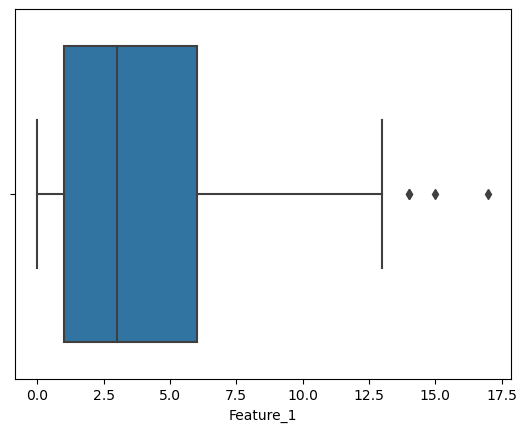

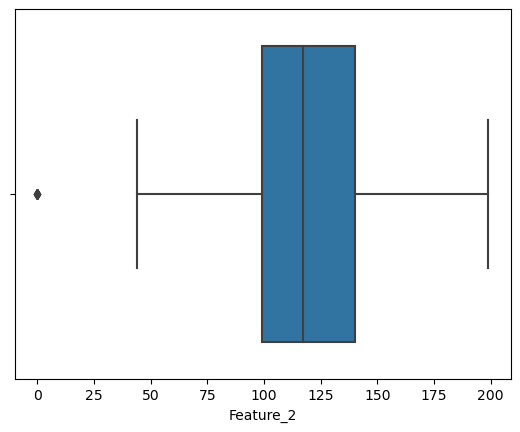

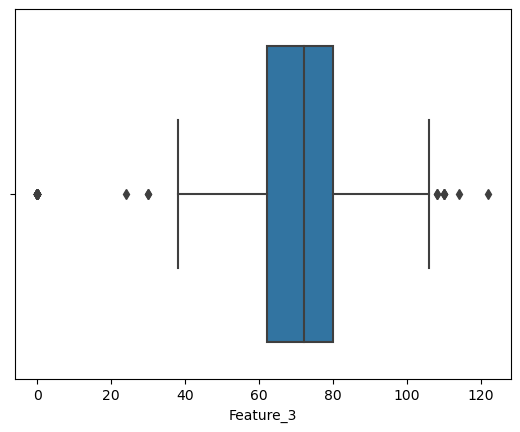

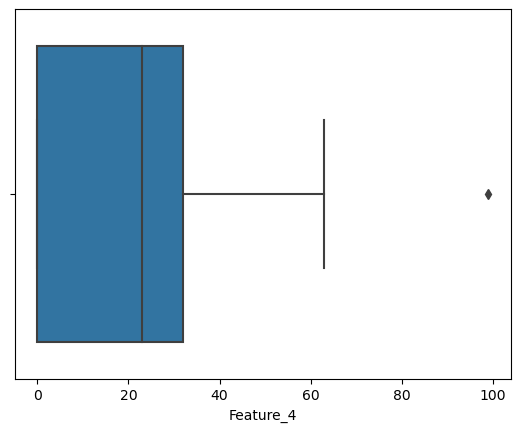

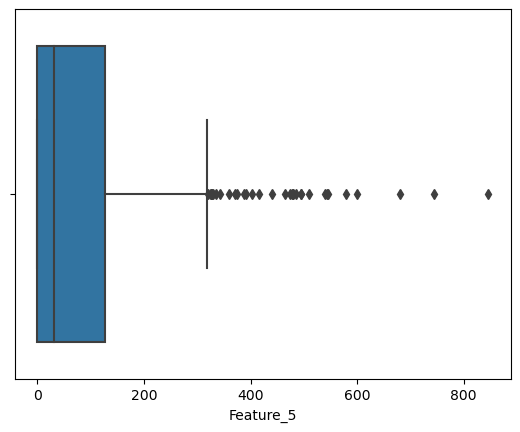

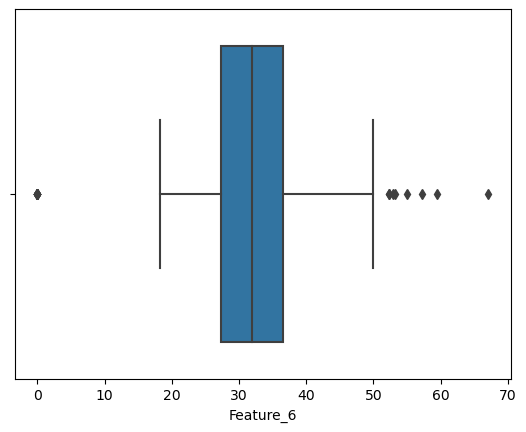

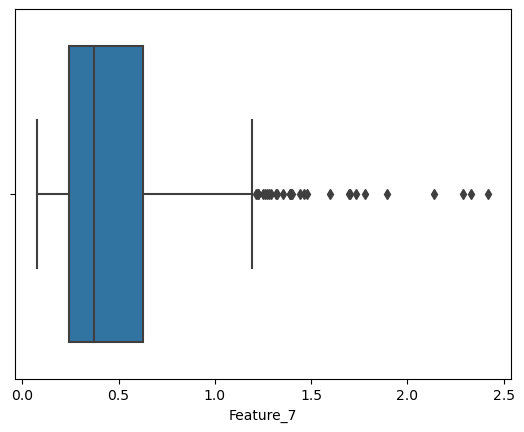

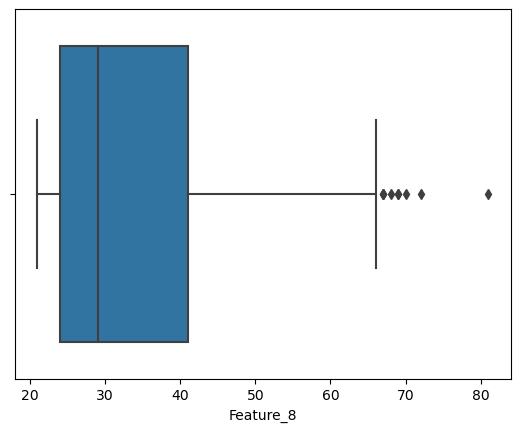

In [8]:
# Checking for outliers using boxplot
for column in df.columns[:-1]:
    sns.boxplot(df[column])
    plt.show()


In [9]:
from scipy import stats

# Calculate the z-scores for each column
z_scores = stats.zscore(df)

# Remove rows with z-scores greater than 3
df = df[(np.abs(z_scores) < 3).all(axis=1)]


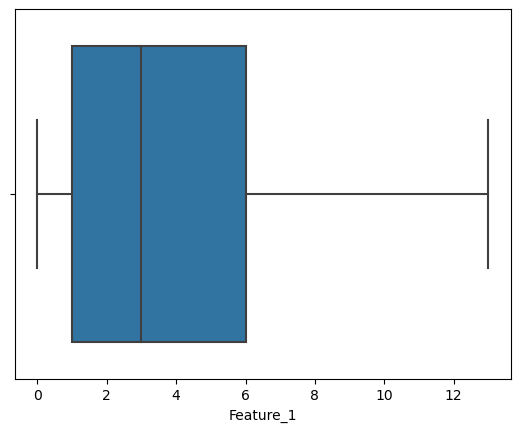

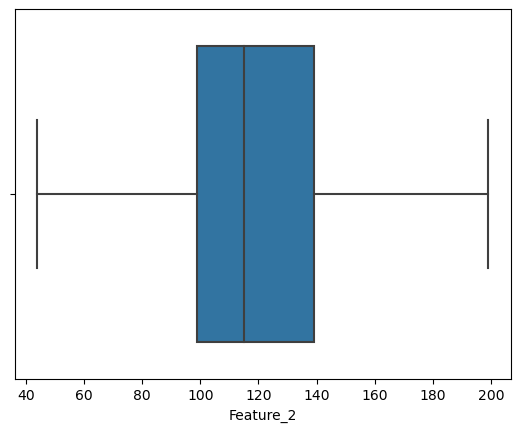

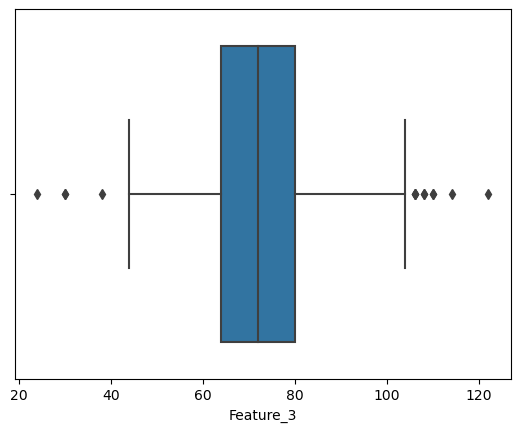

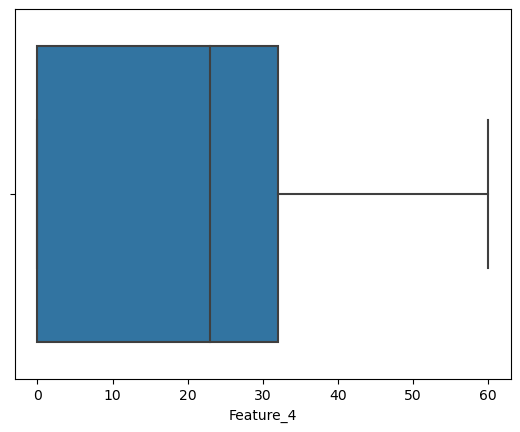

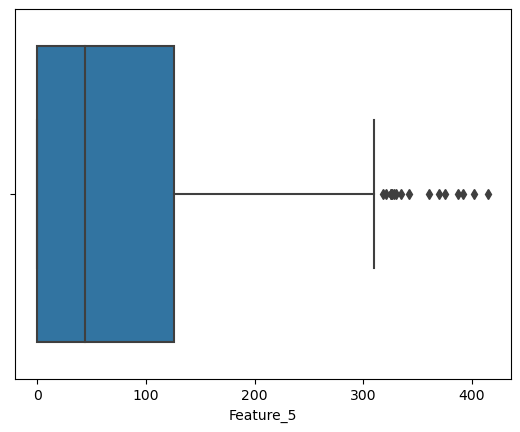

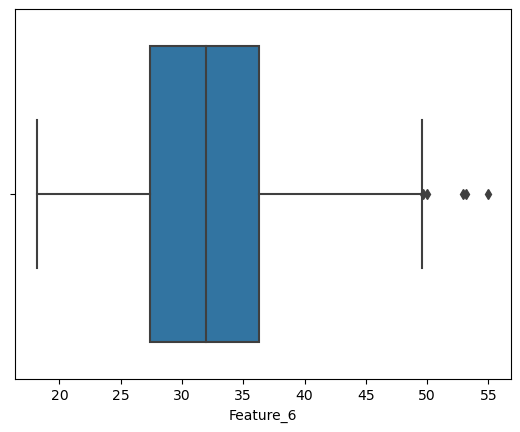

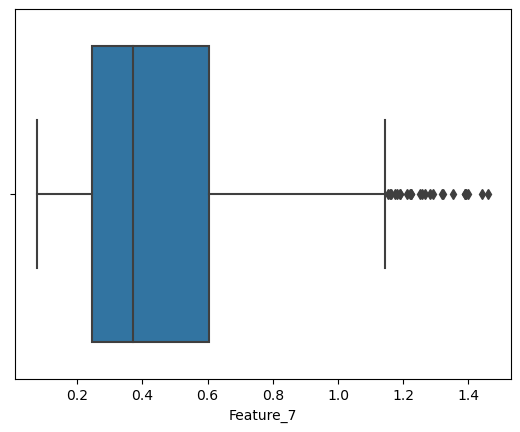

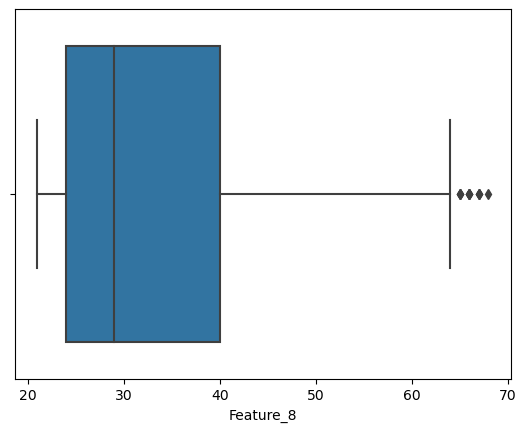

In [10]:
# Checking for outliers using boxplot
for column in df.columns[:-1]:
    sns.boxplot(df[column])
    plt.show()

## 3. Exploratory data analysis

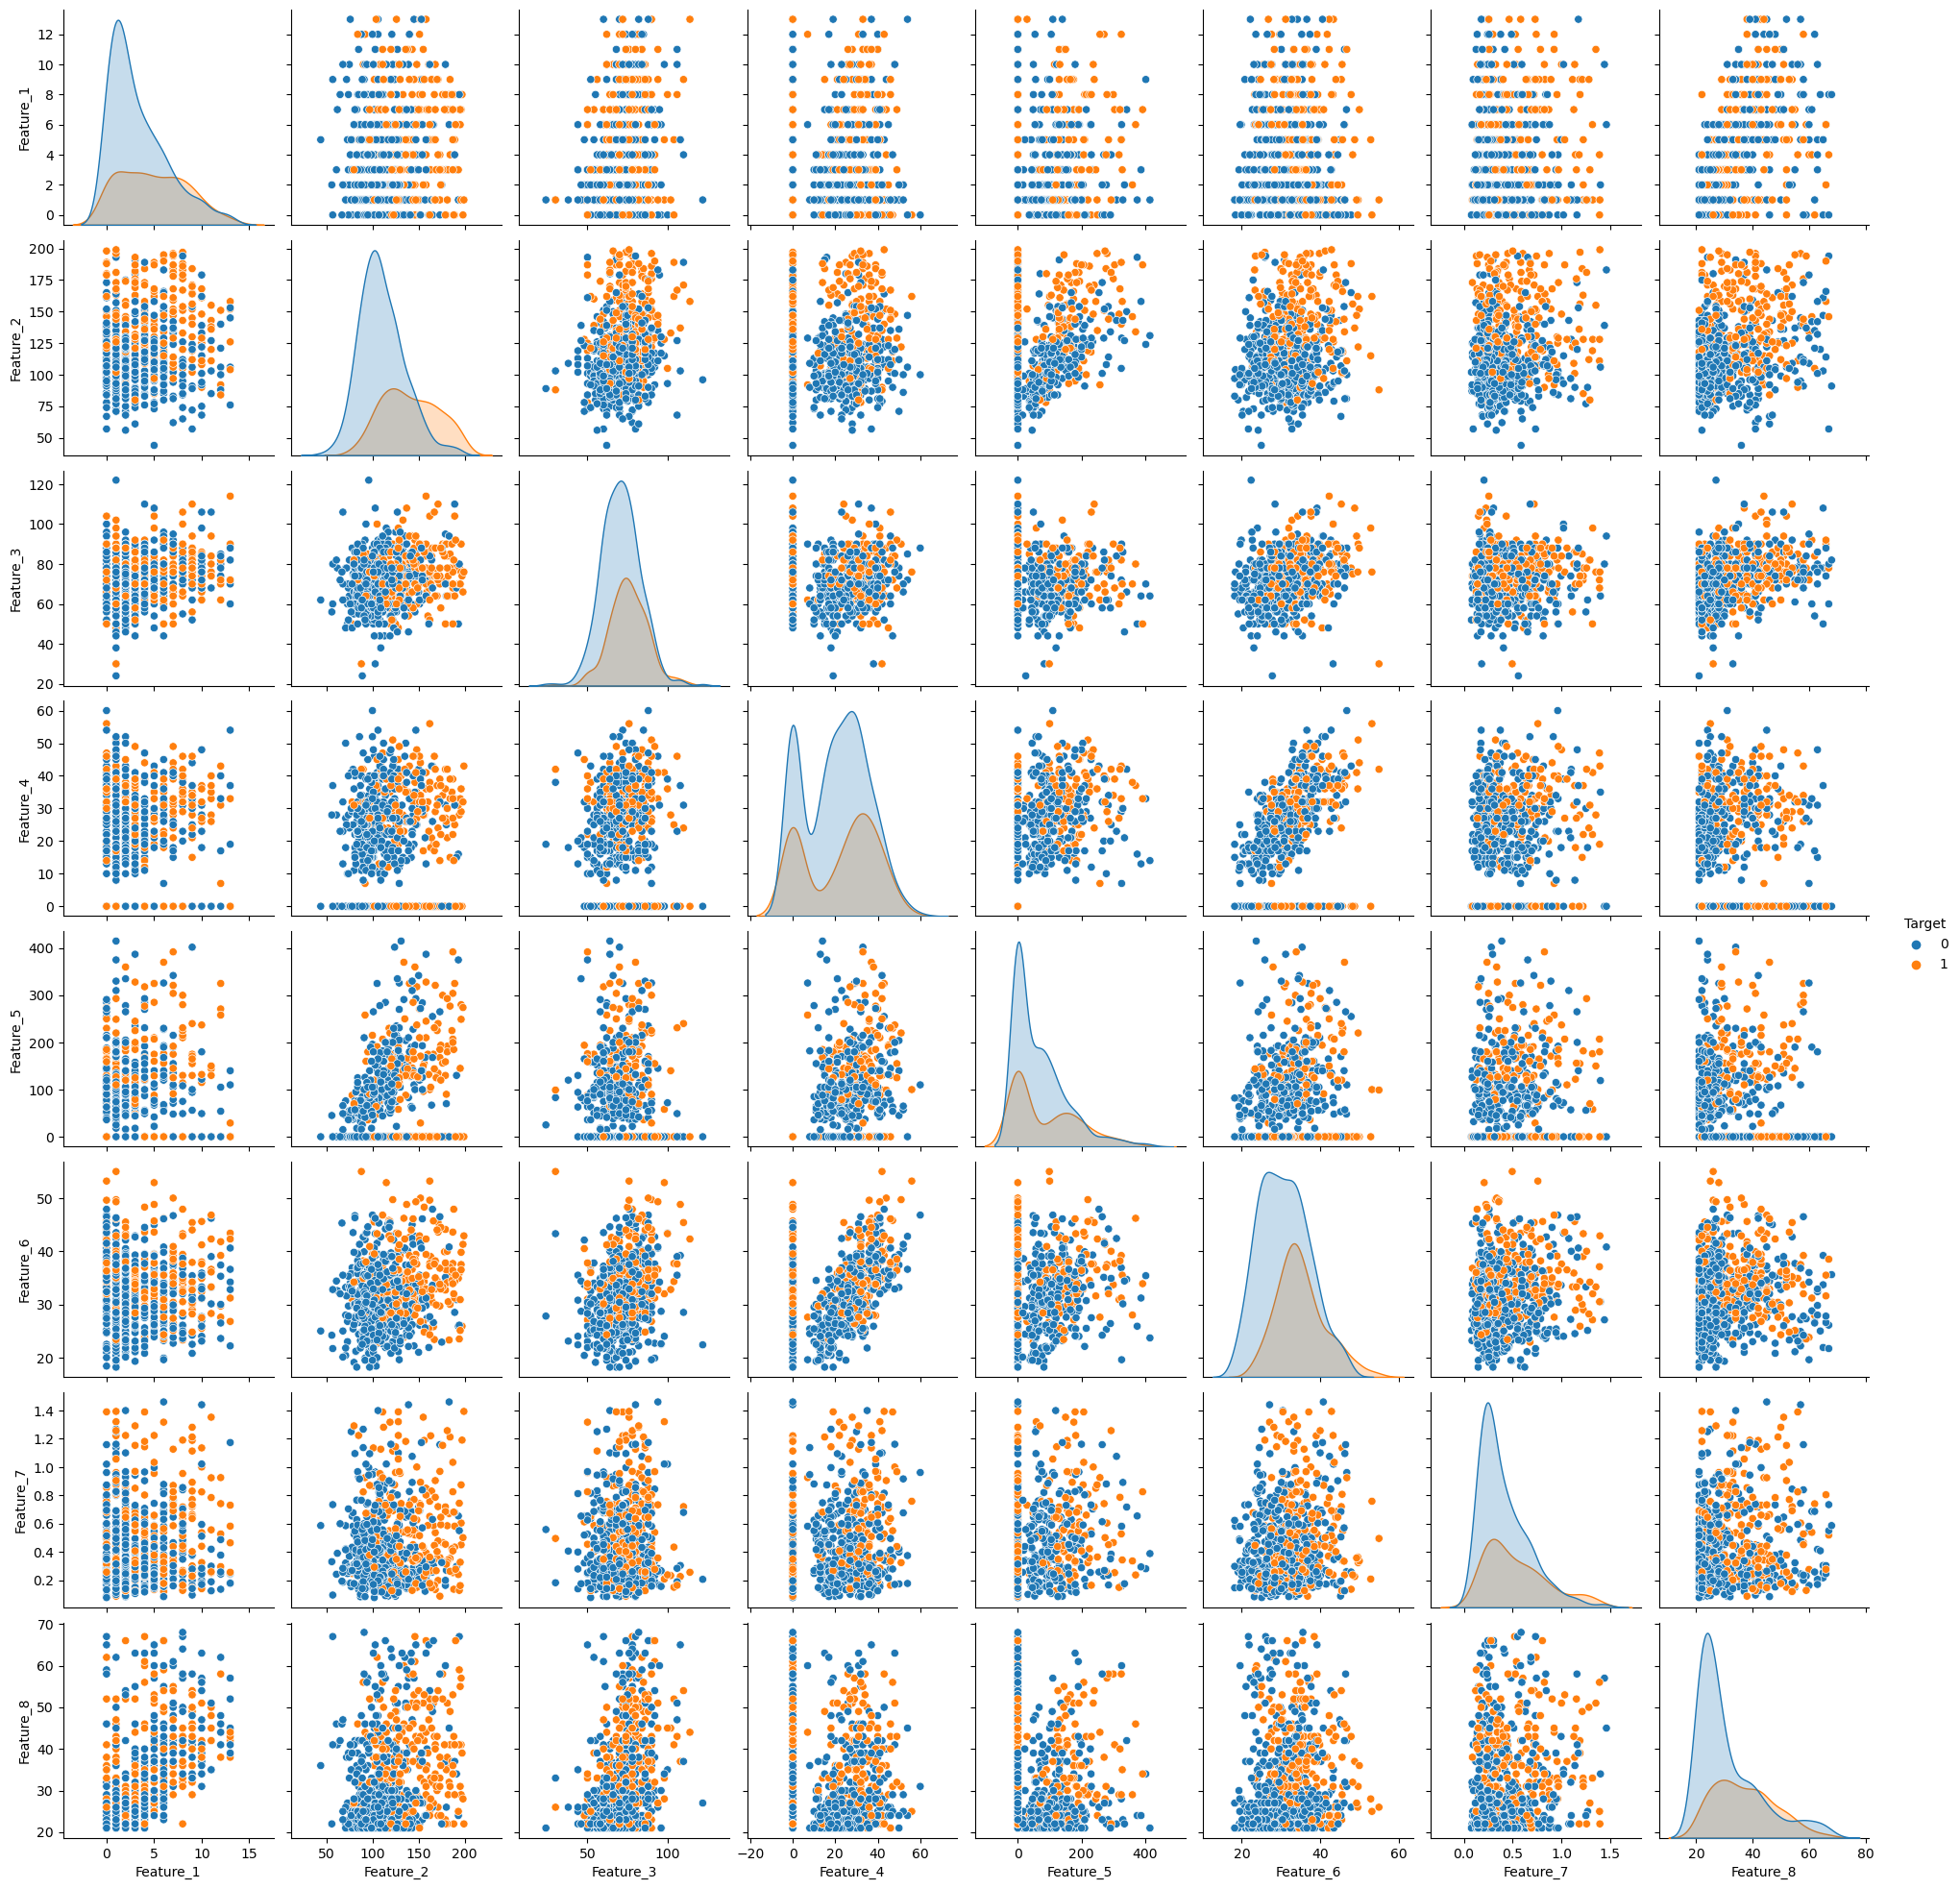

In [11]:
# Plotting the pairplot
sns.pairplot(df, hue="Target")
plt.show()


In [18]:
# check distribution of target variable
print(df['Target'].value_counts())

0    461
1    227
Name: Target, dtype: int64


In [19]:
# check correlations between features and target variable
print(df.corr()['Target'].sort_values(ascending=False))

Target       1.000000
Feature_2    0.478614
Feature_6    0.298056
Feature_8    0.246290
Feature_1    0.226382
Feature_7    0.213872
Feature_3    0.182521
Feature_5    0.110062
Feature_4    0.056662
Name: Target, dtype: float64


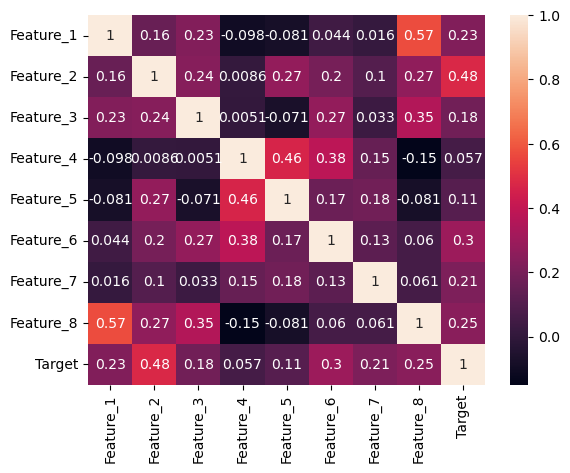

In [12]:
# Plotting the correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

## Model Building

In [13]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


# split data into predictor variables and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define the models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier()
}

# define parameter grids for grid search
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree Classifier': {'max_depth': [3, 5, 7]},
    'Random Forest Classifier': {'n_estimators': [10, 50, 100]},
    'Support Vector Classifier': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors Classifier': {'n_neighbors': [3, 5, 7]}
}

# train and evaluate each model using grid search
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    y_pred_train = best_models[name].predict(X_train)
    y_pred_test = best_models[name].predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_precision = precision_score(y_train, y_pred_train)
    test_precision = precision_score(y_test, y_pred_test)
    train_recall = recall_score(y_train, y_pred_train)
    test_recall = recall_score(y_test, y_pred_test)
    print(name)
    print(f'Train Accuracy: {train_accuracy:.3f}, Test Accuracy: {test_accuracy:.3f}')
    print(f'Train Precision: {train_precision:.3f}, Test Precision: {test_precision:.3f}')
    print(f'Train Recall: {train_recall:.3f}, Test Recall: {test_recall:.3f}\n')

# choose the model with the highest test accuracy as the final model
final_model_name = max(best_models, key=lambda x: accuracy_score(y_test, best_models[x].predict(X_test)))
final_model = best_models[final_model_name]
print(f'The selected model is: {final_model_name}')

# print the best parameters for the selected model
print(f'The best parameters for the {final_model_name} model are: {final_model.get_params()}')


Logistic Regression
Train Accuracy: 0.796, Test Accuracy: 0.773
Train Precision: 0.717, Test Precision: 0.851
Train Recall: 0.551, Test Recall: 0.500

Decision Tree Classifier
Train Accuracy: 0.802, Test Accuracy: 0.681
Train Precision: 0.710, Test Precision: 0.609
Train Recall: 0.599, Test Recall: 0.487

Random Forest Classifier
Train Accuracy: 1.000, Test Accuracy: 0.744
Train Precision: 1.000, Test Precision: 0.755
Train Recall: 1.000, Test Recall: 0.500

Support Vector Classifier
Train Accuracy: 0.802, Test Accuracy: 0.773
Train Precision: 0.710, Test Precision: 0.837
Train Recall: 0.599, Test Recall: 0.512

K-Nearest Neighbors Classifier
Train Accuracy: 0.796, Test Accuracy: 0.729
Train Precision: 0.717, Test Precision: 0.700
Train Recall: 0.551, Test Recall: 0.525

The selected model is: Logistic Regression
The best parameters for the Logistic Regression model are: {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_

Confusion matrix:
 [[119   8]
 [ 42  38]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83       127
           1       0.83      0.47      0.60        80

    accuracy                           0.76       207
   macro avg       0.78      0.71      0.71       207
weighted avg       0.77      0.76      0.74       207

AUC score: 0.8201771653543307


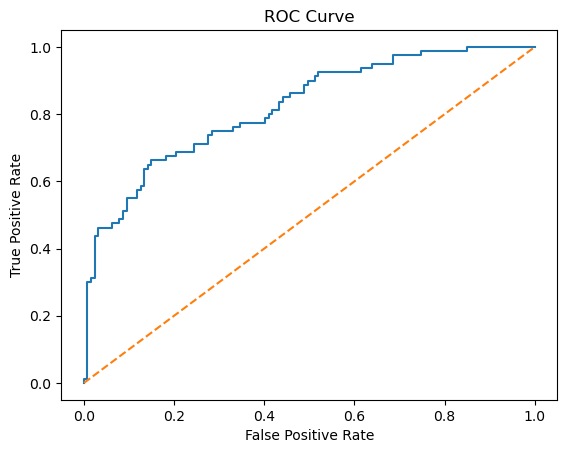

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Fit the logistic regression model on the training data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Calculate the classification report
cr = classification_report(y_test, y_pred)
print('Classification report:\n', cr)

# Calculate the AUC score
auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
print('AUC score:', auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


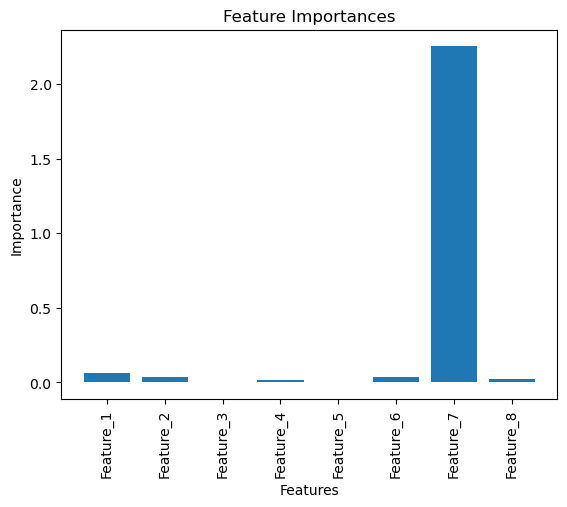

In [20]:
# get feature importances
importances = lr.coef_[0]

# plot feature importances
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns.values, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()